In [13]:
#type: ignore
import tensorflow as tf

training_set: tf.data.Dataset | None
validation_set: tf.data.Dataset | None
training_set, validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    seed=42,
    shuffle=True,
    validation_split=0.2,
    subset="both"
)

Found 7574 files belonging to 3 classes.
Using 6060 files for training.
Using 1514 files for validation.


In [14]:
training_set.class_names

['alzheimers', 'normal', 'parkinsons']

# **Building Model**

## Architechture Improvement
- Used time 0.001 to 0.0001.
- Increased dance layer neuron numbers from 1024 to 1500.

In [15]:
# type: ignore
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(128, 128, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Dropout(0.25),

    Flatten(),
    Dense(1500, activation='relu'),
    Dropout(0.4),

    # Output layer
    Dense(3, activation='softmax')
])

# Compiling Model

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,789,651 (29.72 MB)

 Trainable params: 7,789,651 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training & Validation

In [18]:
training_history = model.fit(training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 142s 734ms/step - accuracy: 0.6265 - loss: 0.7209 - val_accuracy: 0.8309 - val_loss: 0.3742
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 138s 729ms/step - accuracy: 0.8097 - loss: 0.3957 - val_accuracy: 0.8567 - val_loss: 0.3374
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 139s 729ms/step - accuracy: 0.8440 - loss: 0.3329 - val_accuracy: 0.8435 - val_loss: 0.3220
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 136s 718ms/step - accuracy: 0.8798 - loss: 0.2735 - val_accuracy: 0.9115 - val_loss: 0.2042
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 141s 741ms/step - accuracy: 0.9132 - loss: 0.2067 - val_accuracy: 0.9082 - val_loss: 0.2184
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 136s 718ms/step - accuracy: 0.9475 - loss: 0.1416 - val_accuracy: 0.9564 - val_loss: 0.1194
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 138s 728ms/step - accuracy: 0.9665 - loss: 0.0923 - val_accuracy: 0.9399 - val_loss: 0.1477
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 137s 723ms/step - accuracy: 0.9735 -

## Model Evalution

In [19]:
train_loss, train_accuracy = model.evaluate(training_set)

190/190 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.9976 - loss: 0.0055


In [20]:
validation_loss, validation_accuracy = model.evaluate(validation_set)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.9787 - loss: 0.0667


In [21]:
print('Train Loss:', train_loss, '\nTrain Accuracy:', train_accuracy)
print('Validation Loss:', validation_loss, '\nValidation Accuracy:', validation_accuracy)

Train Loss: 0.004300225060433149 
Train Accuracy: 0.9985148310661316
Validation Loss: 0.07177804410457611 
Validation Accuracy: 0.9762219190597534


## Accuracy Result Visualizaton

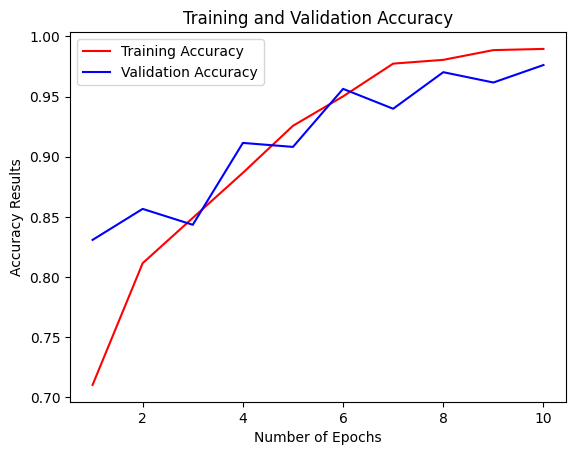

In [22]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 11)
plt.plot(epochs, training_history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Results')
plt.title('Training and Validation Accuracy')
plt.show()


## **Saving Model**

In [23]:
model.save('model.h5')
tf.keras.models.save_model(model, 'model.keras')

In [24]:
prediction = model.predict(validation_set)
prediction

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step


array([[1.7392943e-09, 2.6514632e-10, 1.0000000e+00],
       [9.9999213e-01, 7.7028126e-06, 1.0847219e-07],
       [9.6517618e-13, 3.3760905e-08, 1.0000000e+00],
       ...,
       [3.2894839e-12, 1.0079596e-09, 1.0000000e+00],
       [9.9880111e-01, 1.1972401e-03, 1.6246699e-06],
       [1.8972383e-05, 1.1169282e-04, 9.9986935e-01]], dtype=float32)

In [25]:
predicted_categories = tf.argmax(prediction, axis=1)
predicted_categories

<tf.Tensor: shape=(1514,), dtype=int64, numpy=array([2, 0, 2, ..., 2, 0, 2], dtype=int64)>

In [26]:
y_onehot = tf.concat([y for x, y in validation_set], axis=0)
true_categories = tf.argmax(y_onehot, axis=1)
true_categories

<tf.Tensor: shape=(1514,), dtype=int64, numpy=array([2, 0, 2, ..., 2, 0, 2], dtype=int64)>

In [27]:
from sklearn.metrics import classification_report

print(classification_report(true_categories, predicted_categories, target_names=validation_set.class_names))

              precision    recall  f1-score   support

  alzheimers       0.97      0.95      0.96       466
      normal       0.96      0.98      0.97       563
  parkinsons       1.00      1.00      1.00       485

    accuracy                           0.98      1514
   macro avg       0.98      0.98      0.98      1514
weighted avg       0.98      0.98      0.98      1514



## Confusion Matrix

[[444  22   0]
 [ 12 550   1]
 [  0   1 484]]


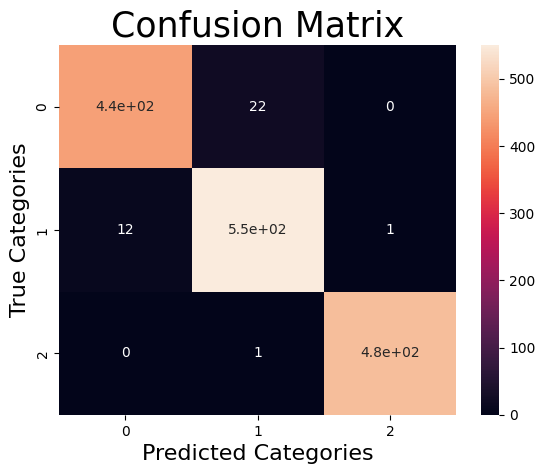

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_categories, predicted_categories)
print(cm)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Categories', fontsize=16)
plt.ylabel('True Categories', fontsize=16)
plt.title('Confusion Matrix', fontsize=25)
plt.show()